<a href="https://colab.research.google.com/github/Archi7799/Aircraft-Loyalty-Program-Analysis/blob/main/Aircraft_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [2]:
calendar = pd.read_csv('Calendar.csv')
flight = pd.read_csv('Customer Flight Activity.csv')
loyalty = pd.read_csv('Customer Loyalty History.csv')

# Calendar Cleaning

In [3]:
calendar.head(3)

,Date,Start of Year,Start of Quarter,Start of Month
0,2012-01-01,2012-01-01,2012-01-01,2012-01-01
1,2012-01-02,2012-01-01,2012-01-01,2012-01-01
2,2012-01-03,2012-01-01,2012-01-01,2012-01-01


In [23]:
dp = pd.DataFrame(calendar)

In [26]:
dp.isnull().sum()

Date                0
Start of Year       0
Start of Quarter    0
Start of Month      0
dtype: int64

In [29]:
duplicates = dp[dp.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Date, Start of Year, Start of Quarter, Start of Month]
Index: []


In [182]:
dp['Start of Year'].value_counts()

2012-01-01    366
2016-01-01    366
2013-01-01    365
2014-01-01    365
2015-01-01    365
2017-01-01    365
2018-01-01    365
Name: Start of Year, dtype: int64

# Flight cleaning

In [4]:
df = pd.DataFrame(flight)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132404 entries, 0 to 132403
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               132404 non-null  int64  
 1   Year                         132404 non-null  int64  
 2   Month                        132404 non-null  int64  
 3   Total Flights                132404 non-null  int64  
 4   Distance                     132404 non-null  int64  
 5   Points Accumulated           132403 non-null  float64
 6   Points Redeemed              132403 non-null  float64
 7   Dollar Cost Points Redeemed  132403 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 8.1 MB


In [6]:
df.describe()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,132404.000000,132404.000000,132404.000000,132404.000000,132404.000000,132403.000000,132403.000000,132403.000000
mean,542485.756601,2017.527567,6.783126,3.268632,4901.431890,4975.649562,59.394817,10.692771
std,260135.977369,0.499241,3.323384,1.484697,3050.046577,3568.156177,171.337970,30.845749
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,314589.000000,2017.000000,4.000000,2.000000,2820.000000,2828.000000,0.000000,0.000000
50%,540497.000000,2018.000000,7.000000,3.000000,4296.000000,4305.000000,0.000000,0.000000
75%,766775.000000,2018.000000,10.000000,4.000000,6432.000000,6450.000000,0.000000,0.000000
max,999982.000000,2018.000000,12.000000,28.000000,65184.000000,97776.000000,876.000000,158.000000


People do not redeem points much

In [7]:
df.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Total Flights                  0
Distance                       0
Points Accumulated             1
Points Redeemed                1
Dollar Cost Points Redeemed    1
dtype: int64

In [8]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Loyalty Number, Year, Month, Total Flights, Distance, Points Accumulated, Points Redeemed, Dollar Cost Points Redeemed]
Index: []


In [9]:
df[df.isna().any(axis=1)]

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
132403,110001,2017,1,1,11,NaN,NaN,NaN


In [10]:
df[(df['Loyalty Number'] == 192898) & (df['Year'] == 2018)]

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
72203,192898,2018,2,3,4917,4917.0,0.0,0.0
82461,192898,2018,9,3,7155,7155.0,0.0,0.0
121255,192898,2018,7,2,2176,2176.0,0.0,0.0
126199,192898,2018,10,2,2310,2310.0,0.0,0.0


In [11]:
df = df.dropna(subset='Points Redeemed')

In [12]:
df = df.drop_duplicates()

In [13]:
df = df[(df['Total Flights'] != 0) | (df['Distance'] != 0) | (df['Points Accumulated'] != 0) | (df['Points Redeemed'] != 0.0) | (df['Dollar Cost Points Redeemed'] != 0.0)]

In [14]:
df.head(10)

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0.0,0.0
1,100590,2018,7,12,9168,13752.0,0.0,0.0
2,100590,2018,5,4,6504,9756.0,0.0,0.0
3,100590,2018,10,0,0,0.0,512.0,92.0
11,102376,2018,6,24,21216,31824.0,0.0,0.0
12,102376,2018,12,15,16500,24750.0,556.0,100.0
13,102376,2018,7,12,25080,37620.0,0.0,0.0
14,102376,2018,8,12,6360,9540.0,0.0,0.0
15,102376,2018,9,6,7452,11178.0,0.0,0.0
16,102376,2018,5,4,2972,4458.0,0.0,0.0


In [15]:
df['Year'].unique()

array([2018, 2017])

# Loyalty cleaning

In [16]:
dt = pd.DataFrame(loyalty)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [17]:
dt.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [18]:
dt.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [19]:
duplicates = dt[dt.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Loyalty Number, Country, Province, City, Postal Code, Gender, Education, Salary, Marital Status, Loyalty Card, CLV, Enrollment Type, Enrollment Year, Enrollment Month, Cancellation Year, Cancellation Month]
Index: []


In [20]:
dt[dt.isnull().any(axis=1)]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16731,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,College,NaN,Single,Star,61134.68,Standard,2012,9,NaN,NaN
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN


In [21]:
dt['Enrollment Year'].unique()

array([2016, 2014, 2013, 2012, 2015, 2018, 2017])

# Analysis

In [30]:
clients = df.drop(['Year', 'Month'], axis=1)
clients = clients.groupby('Loyalty Number', as_index=False).sum()

In [31]:
final = pd.merge(loyalty, clients, on='Loyalty Number', how='inner')
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14382
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               14383 non-null  int64  
 1   Country                      14383 non-null  object 
 2   Province                     14383 non-null  object 
 3   City                         14383 non-null  object 
 4   Postal Code                  14383 non-null  object 
 5   Gender                       14383 non-null  object 
 6   Education                    14383 non-null  object 
 7   Salary                       10707 non-null  float64
 8   Marital Status               14383 non-null  object 
 9   Loyalty Card                 14383 non-null  object 
 10  CLV                          14383 non-null  float64
 11  Enrollment Type              14383 non-null  object 
 12  Enrollment Year              14383 non-null  int64  
 13  Enrollment Month

In [32]:
final.isnull().sum()

Loyalty Number                     0
Country                            0
Province                           0
City                               0
Postal Code                        0
Gender                             0
Education                          0
Salary                          3676
Marital Status                     0
Loyalty Card                       0
CLV                                0
Enrollment Type                    0
Enrollment Year                    0
Enrollment Month                   0
Cancellation Year              13378
Cancellation Month             13378
Total Flights                      0
Distance                           0
Points Accumulated                 0
Points Redeemed                    0
Dollar Cost Points Redeemed        0
dtype: int64

Assuming client program is not finished or simply data not provided for Cancellation Year and Month.

Dropping the Country column as it only has value = "Canada" for all records. The Dollar Cost points redeemed can be ignored as well, since we can work with the total points redeemed instead. The Province column can be dropped as well, as we can work with the more varied 'City' column for better clustering. The Postal Code can be dropped as for now it will go too narrow.

In [33]:
final = final.drop(['Country','Province','Postal Code','Dollar Cost Points Redeemed'], axis=1)

In [34]:
corr_matrix = final.corr()

<ipython-input-34-75b1d2befd9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = final.corr()


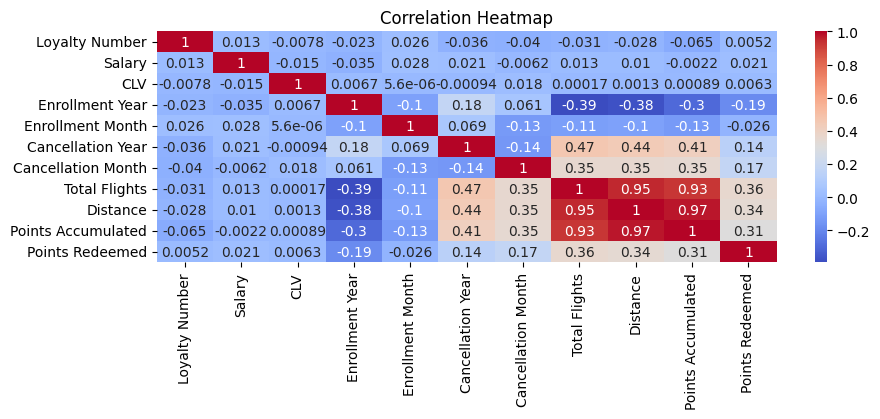

In [38]:
plt.figure(figsize=(10, 3))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

## City Analysis

In [49]:
flights_per_city = final.groupby('City')['Total Flights'].sum().reset_index()
flights_per_city = flights_per_city.sort_values(by = 'Total Flights', ascending=False)

fig2 = px.line(flights_per_city, x = 'City', y = 'Total Flights', markers=True, title = 'Total Flights per City')
fig2.show()

In [50]:
flights = final[final['City'].isin(['Toronto', 'Vancouver', 'Montreal','Winnipeg'])]
sum_TVM = flights['Total Flights'].sum()
sum_total = final['Total Flights'].sum()
percent=(sum_TVM/sum_total)*100

print(f"Out of all the total flights in Canada, {percent:.2f}% of them are from Toronto, Vancouver, Montreal and Winnipeg")

Out of all the total flights in Canada, 51.55% of them are from Toronto, Vancouver, Montreal and Winnipeg


Top cities of Canada involving Toronta, Vancouver, Montreal, and Winnipeg together booked 51.55% which is half percentage of all flights.

In [118]:
import plotly.subplots as sp
import plotly.graph_objects as go

In [139]:
fig = sp.make_subplots(specs=[[{"type": "bar"}]])

d = pd.pivot_table(data=flights, values='Total Flights', columns=['Loyalty Card'], index=['City'], aggfunc='count')
for column in d.columns:
    fig.add_trace(go.Bar(x=d.index, y=d[column], name=column))

fig.update_layout(title='For each loyalty card, total flighs per top cities',width=500, height=300, yaxis_title='Count of total flights',xaxis_title='City')
fig.show()


Top cities shows clients are in Star Loyalty Card then Nova then Aurora.

## Marital Status Analysis

In [52]:
t = final[final['Enrollment Year'].isin([2017, 2018])]

In [53]:
fig3 = px.histogram(final, x='Marital Status', nbins=len(t['Marital Status'].unique()), title='Enrollment by Marital Status')
fig3.update_layout(width=400, height=300)
fig3.show()

In [162]:
fig4 = px.histogram(t, x='Marital Status', nbins=len(t['Marital Status'].unique()), title='Enrollment by Marital Status in 2017 and 2018')
fig4.update_layout(width=500, height=300)
fig4.show()

Married clients counts to 2508 alone in 2017-2018 , bagging first position to use the program more than others over past years.

In [167]:
loyalty_card_counts = t[t['Marital Status'] == 'Married']['Loyalty Card'].value_counts()
fig = px.bar(loyalty_card_counts, title='Loyalty Card Usage by Married People')
fig.update_layout(width=500, height=300)
fig.show()

Married clients uses Star card most.

## Education Analysis

In [55]:
fig5 = px.histogram(final, x='Education', nbins=len(t['Education'].unique()), title='Enrollment by Education ')
fig5.update_layout(width=500, height=400)
fig5.show()

In [56]:
fig6 = px.histogram(t, x='Education', nbins=len(t['Education'].unique()), title='Enrollment by Education in 2017 and 2018')
fig6.update_layout(width=500, height=400)
fig6.show()

Client with 'Bachelor' degree uses the program more than others with 8967 over 2012-2018 and 2716 in 2017-2018 itself, then College degree clients.

In [168]:
loyalty_card_counts = t[t['Education'] == 'Bachelor']['Loyalty Card'].value_counts()
fig = px.bar(loyalty_card_counts, title='Loyalty Card Usage by Bachelor Degree Holders')
fig.update_layout(width=400, height=300)
fig.show()


Maximum client with bachelor degree uses Star card.

## CLV Analysis

In [98]:
fig7 = px.histogram(final, x='Loyalty Card', y='CLV', color='Loyalty Card', title='CLV vs Loyalty Card')
fig7.update_layout(width=500, height=300)
fig7.show()

Client has higher value if they are from the Star Loyalty Card, then it is Nova and then it's Aurora.

In [99]:
fig7 = px.scatter(final, x='Total Flights', y='CLV', color='Total Flights', title='CLV vs Total Flights')
fig7.update_layout(width=600, height=400)
fig7.show()

In general, ignoring 3 outliers, CLV decreases as total flights increases.

## Loyalty Card Analysis

In [103]:
fig8 = px.histogram(final, x='Loyalty Card', color='Enrollment Type', title='Loyalty Card vs Enrollment Type')
fig8.update_layout(width=500, height=300)
fig8.show()

In [111]:
fig9 = px.histogram(final, x='Total Flights', color='Loyalty Card', title='Loyalty Card vs Total Flights')
fig9.update_layout(width=500, height=300)
fig9.show()

Star members take flights then Nova then Aurora.

## Enrollment and Cancellation Analysis

In [131]:
counts_enrollment = final.groupby('Enrollment Year')['Loyalty Number'].count().reset_index()
counts_cancellation = final.groupby('Cancellation Year')['Loyalty Number'].count().reset_index()
merged = pd.merge(counts_enrollment, counts_cancellation, how='outer', left_on='Enrollment Year', right_on='Cancellation Year')
merged = merged.rename(columns={'Loyalty Number_x': 'Enrollments', 'Loyalty Number_y': 'Cancellations'})

fig10 = px.line(merged, x='Enrollment Year', y=['Enrollments', 'Cancellations'], markers=True, title='Client Enrollments vs Cancellations', labels={'value': 'Count', 'variable': 'Event', 'Enrollment Year': 'Year'})
fig10.update_layout(width=800, height=500)
fig10.show()

There is a loss making trend from 2017-18 owing to the decrease in number of enrollments and increase in number of cancellations.

In [160]:
grouped_data = final.groupby(['Enrollment Year', 'Enrollment Month'])['Loyalty Number'].count().reset_index(name='Enrollments')

top_3_months = grouped_data.groupby('Enrollment Year').apply(lambda x: x.nlargest(3, 'Enrollments'))
fig = px.bar(top_3_months, x='Enrollment Month', y='Enrollments', color='Enrollment Year', title='Top 3 Enrollment Months by Year')
fig.show()


July shows highest enrollments then May then September.

## Gender Analysis

In [151]:
gender_allyears = pd.pivot_table(data=final, values='Total Flights', columns=['Gender'], index=['Loyalty Card'], aggfunc='count')

fig = px.bar(gender_allyears, title='Loyalty Card vs Gender ', barmode='group')
fig.update_layout(width=500, height=300)
fig.show()


Clients with higher count are males for Star and Aurora for all years.
Clients with higher count are females for Nova for all years.


In [152]:
gender_2017_2018 = pd.pivot_table(data=t, values='Total Flights', columns=['Gender'], index=['Loyalty Card'], aggfunc='count')

fig = px.bar(gender_2017_2018, title='Loyalty Card vs Gender ', barmode='group')
fig.update_layout(width=500, height=300)
fig.show()

For Aurora and Nova , Clients with higher count are females.
For Star, it's males.

## Total Flights and Distance Analysis

In [143]:
fig = px.scatter(final, x='Distance', y='Total Flights', color='Distance', title='Change in Total Flights on Distance ')
fig.update_layout(width=600, height=500)
fig.show()

In 2017-2018, number of flights increases as per increased in distance.

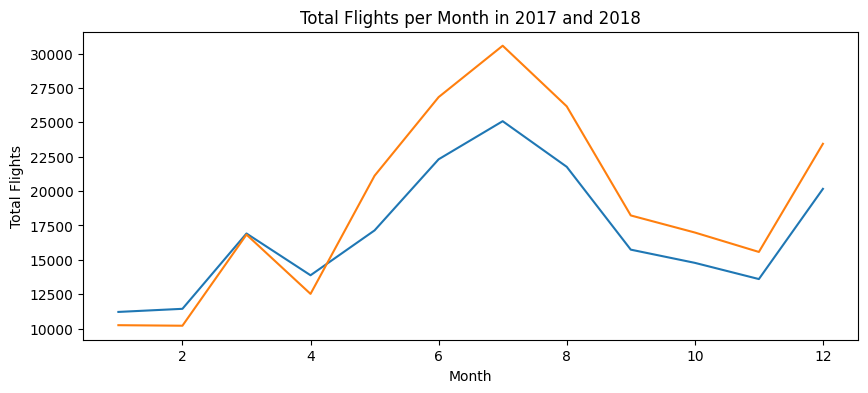

In [142]:
df_2017 = df[df['Year'] == 2017]
df_2018 = df[df['Year'] == 2018]

df_2017_monthly = df_2017.groupby('Month')['Total Flights'].sum()
df_2018_monthly = df_2018.groupby('Month')['Total Flights'].sum()

plt.figure(figsize=(10, 4))
plt.plot(df_2017_monthly.index, df_2017_monthly.values, label='2017')
plt.plot(df_2018_monthly.index, df_2018_monthly.values, label='2018')

plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.title('Total Flights per Month in 2017 and 2018')
plt.show()

There is a peek months June, July and August which shows maximum enrollments. And again rise in December. Conclude that it may be due to Summer and Winter Holidays can also be visible in these months.

## Points Analysis

In [179]:
fig4 = px.scatter(final, y = 'Points Accumulated', x = 'Points Redeemed',size = 'Total Flights' ,title = 'Points Accumulated vs Points Redeemed')
fig.update_layout(width=500, height=300)
fig4.show()

As total flights increases, points accumulated increases. Journey about points redeemed is harder to say.

# Conclusion


1. Top cities of Canada involving **Vancouver,Toronta, Montreal, and Winnipeg**together booked 51.55% which is half percentage of all flights. Top cities shows clients are in Star Loyalty Card then Nova then Aurora.

2. **Married clients** counts to 2508 alone in 2017-2018 but also overall, bagging first position to use the program more than others over past years. They uses **Star** Card most.

3. Client with '**Bachelor**' degree uses the program more than others with 8967 over 2012-2018 and 2716 in 2017-2018 itself, then College degree clients. They are in **Star** Card category mostly.

4. Client has higher value if they are from the **Star** Loyalty Card, then it is Nova and then it's Aurora. In general, ignoring 3 outliers, **CLV decreases as total flights increases**.

5. Flights are taken in this order **Star > Nova > Aurora**. **Standard** type enrollment is popular among clients.

6. There is a **loss making trend from 2017-18** owing to the decrease in number of enrollments and increase in number of cancellations. **July** shows highest enrollments then **May then September**.

7. Clients with higher count are **males** for Star and Aurora for all years. Clients with higher count are females for Nova for all years. For Aurora and Nova , Clients in 2017-2018 with higher count are **females**. For Star, it's males.

8. In 2017-2018, **number of flights increases as per increased in distance**. There is a peek months **June, July and August** which shows maximum enrollments. And again rise in December. Conclude that it may be due to Summer and Winter Holidays can also be visible in these months.

9. As **total flights increases, points accumulated increases**. Journey about points redeemed is harder to say.